In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv('/content/Assignment-4.csv')
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


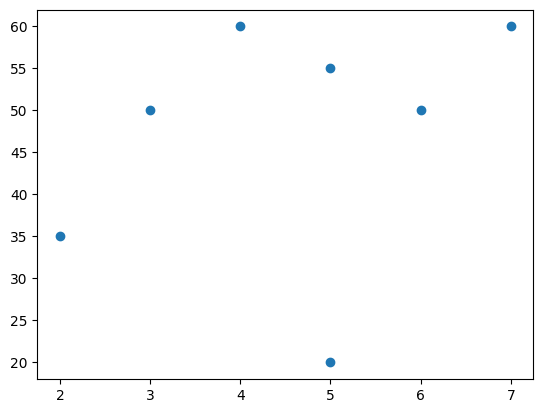

In [5]:
plt.scatter(df[['Weight']],df[['Price']])

In [6]:
x=df['Weight']
x

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [7]:
x_mean=x.mean()
x_mean

4.571428571428571

In [8]:
dev_x=x-x_mean
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [9]:
y=df['Price']
y

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64

In [10]:
y_mean=y.mean()
y_mean

47.142857142857146

In [11]:
dev_y=y-y_mean
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

In [12]:
multiply=dev_x*dev_y
multiply

0    31.224490
1    -7.346939
2   -11.632653
3    -4.489796
4     4.081633
5     3.367347
6    31.224490
dtype: float64

In [13]:
numerator_M=sum(multiply)
numerator_M

46.42857142857143

In [14]:
denominator_M=sum(dev_x**2)
denominator_M

17.714285714285715

In [15]:
m=numerator_M/denominator_M
m

2.620967741935484

In [16]:
c=y.mean()-m*x.mean()
c

35.16129032258065

In [17]:
x=6
y=m*x+c
y

50.88709677419355

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_Reg=LinearRegression()

In [20]:
linear_Reg.fit(df[['Weight']],df[['Price']])

LinearRegression()

In [21]:
coefFromModel=linear_Reg.coef_
coefFromModel

array([[2.62096774]])

In [22]:
interceptFromModel=linear_Reg.intercept_
interceptFromModel

array([35.16129032])

In [23]:
if coefFromModel==m:
    print('matched')
else:
    print('not matched')

matched


In [24]:
if interceptFromModel==c:
    print('matched')
else:
    print('not matched')

matched


In [25]:
pred_Six=linear_Reg.predict([[6]])
pred_Six

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [26]:
if pred_Six==y:
    print('matched')
else:
    print('not matched')

matched


In [27]:
pred_Price=linear_Reg.predict(df[['Weight']])
pred_Price

array([[40.40322581],
       [45.64516129],
       [48.26612903],
       [43.02419355],
       [50.88709677],
       [48.26612903],
       [53.50806452]])

In [28]:
df['Pred_Price']=pred_Price
df

,Weight,Price,Pred_Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [29]:
residuals=df['Price']-df['Pred_Price']
residuals

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [30]:
df['Residual']=residuals
df

,Weight,Price,Pred_Price,Residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [31]:
n=len(df)
n


7

In [32]:
manual_mae=sum(abs(residuals))/n
manual_mae

9.87327188940092

In [33]:
manual_mse=sum(residuals**2)/n
manual_mse

167.30990783410135

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
mse=mean_squared_error(df['Price'], pred_Price)
mse

167.30990783410135

In [36]:
mae=mean_absolute_error(df['Price'], pred_Price)
mae

9.87327188940092

In [37]:
if manual_mae==mae:
    print('matched')
else:
    print('not matched')

matched


In [38]:
rmse=np.math.sqrt(mse)
rmse

<ipython-input-38-5c4bbba5b002>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  rmse=np.math.sqrt(mse)


12.934833119685052

In [39]:
if manual_mse==mse:
    print('matched')
else:
    print('not matched')

matched


In [40]:
linear_Reg.score(df[['Weight']], df[['Price']])

0.09412315095348434

Text(0.5, 1.0, 'Vegitables Weight-Price')

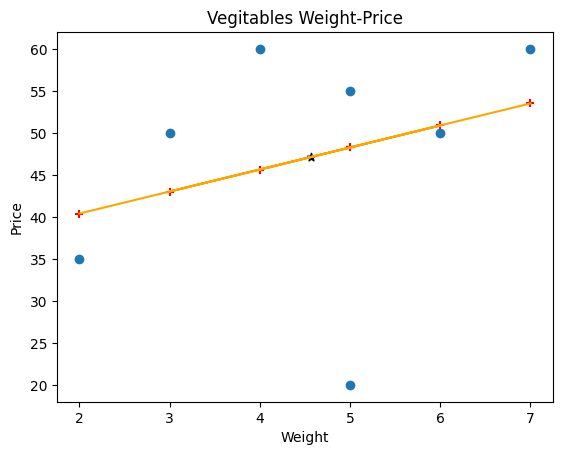

In [41]:
plt.scatter(df[['Weight']],df[['Price']])
plt.plot(df[['Weight']],df[['Pred_Price']], color='orange')
plt.scatter(df[['Weight']],df[['Pred_Price']], marker='+', color='red')
plt.scatter(df[['Weight']].mean(),df[['Pred_Price']].mean(), marker='*', color='black')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegitables Weight-Price')